**降維 Dimension Reduction**

資料常見的類型包含:

1. 一維 Dimension
2. 二維 Two-Dimension
3. 三維 Three-Dimension

Dimension Reduction的主要目的是為了將資料壓縮，且保有資料原本的特質，同時**利於製作資料視覺化**。

**降維演算法**

常見的降維方式分別有:

- 主成分分析 (PCA)
- t-隨機鄰近嵌入法(t-SNE)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
df = pd.DataFrame(
    data=np.c_[iris["data"], iris["target"]],
    columns=["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"]
)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [3]:
from sklearn.model_selection import train_test_split

X = df.drop(labels=["Species"], axis=1).values
y = df["Species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Train shape: {X_train.shape}")
print(f"Test shape: {X_test.shape}")

Train shape: (105, 4)
Test shape: (45, 4)


**PCA**

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, iterated_power=1)
train_reduced = pca.fit_transform(X_train)

print(f"PCA方差比: {pca.explained_variance_ratio_}")
print(f"PCA方差值: {pca.explained_variance_}")

PCA方差比: [0.92390396 0.05371612]
PCA方差值: [4.38034545 0.25467493]


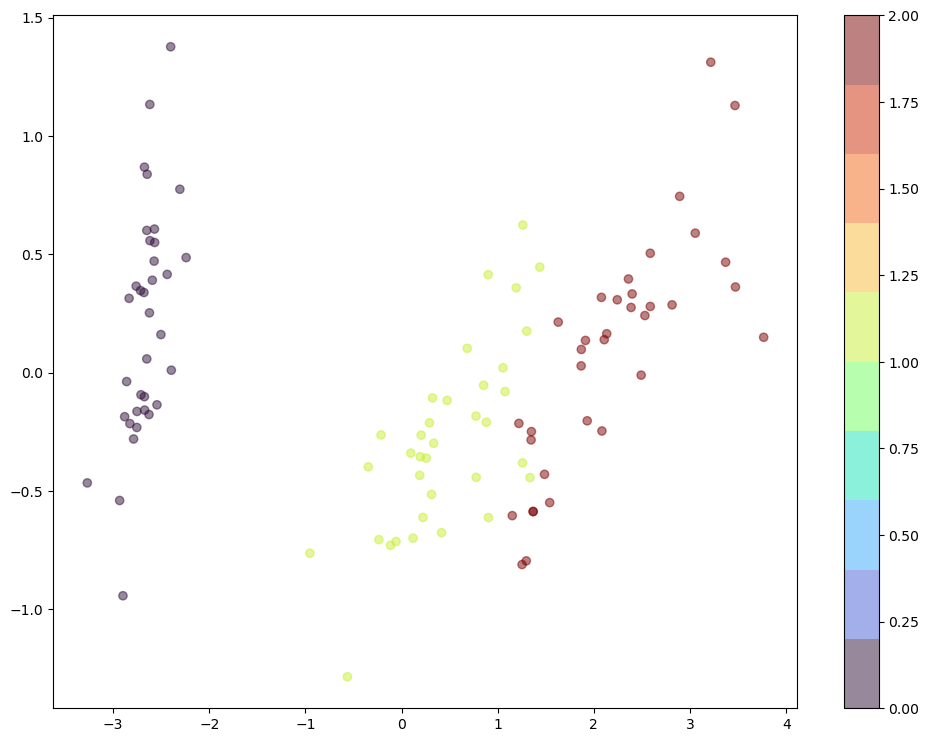

In [5]:
plt.figure(figsize=(12, 9))
plt.scatter(
    train_reduced[:, 0],
    train_reduced[:, 1],
    c=y_train,
    alpha=0.5,
    # Colormaps reference: https://matplotlib.org/stable/users/explain/colors/colormaps.html
    cmap=plt.get_cmap("turbo", 10)
)

plt.colorbar()

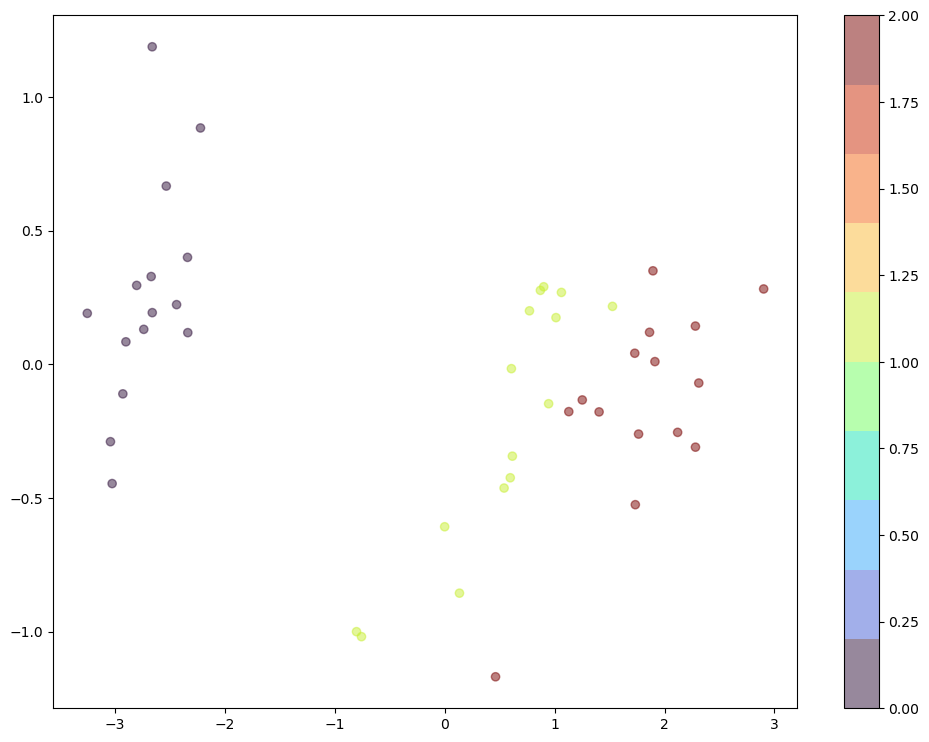

In [6]:
test_reduced = pca.transform(X_test)

plt.figure(figsize=(12, 9))
plt.scatter(
    test_reduced[:, 0],
    test_reduced[:, 1],
    c=y_test,
    alpha=0.5,
    cmap=plt.get_cmap("turbo", 10)
)
plt.colorbar()

In [7]:
from sklearn.manifold import TSNE

tsneModel = TSNE(n_components=2, random_state=42, max_iter=1000)
train_reduced = tsneModel.fit_transform(X_train)

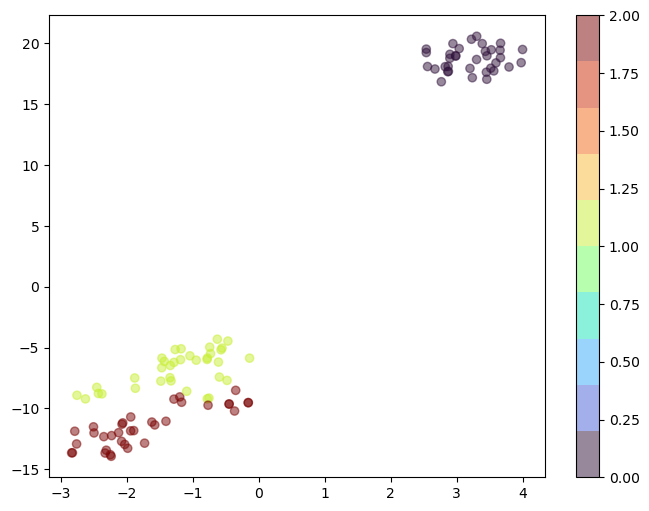

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(
    train_reduced[:, 0],
    train_reduced[:, 1],
    c=y_train,
    alpha=0.5,
    cmap=plt.get_cmap("turbo", 10)
)
plt.colorbar()